# test DSI version 3

Instructions for the test: https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit?usp=sharing


0. Access some historical IMDB data files from the shared drive: 

https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn
from scipy import stats
import torch
from torch.autograd import Variable

## 1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.  

In [2]:
## tried this but didn't work (file might be too large/ tried PyDrive too) so I downladed the files on my local drive

# url = 'https://drive.google.com/file/d/1wWbLYAsVldXrnOxdJlu4URsPynYykY22/view?usp=sharing'
# url_path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# basics_all = pd.read_csv(url_path, sep='\t', on_bad_lines = 'warn')

In [3]:
path = r'D:\OneDrive - Nelson Mandela University\Work_Other\DSI test\Dec2021\data'

In [4]:
basics_all = pd.read_csv(path+'\\title.basics.tsv.gz', sep='\t', on_bad_lines = 'warn')
print(np.shape(basics_all))
basics_all.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(5330276, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
akas_all = pd.read_csv(path+'\\title.akas.tsv.gz', sep='\t', on_bad_lines = 'warn')
print(np.shape(akas_all))
akas_all.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(3423660, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [7]:
ratings_all = pd.read_csv(path+'\\title.ratings.tsv.gz', sep='\t', on_bad_lines = 'warn')
print(np.shape(ratings_all))
ratings_all.head(5)

(874203, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


## 2. Drop duplicates in all the dataframes, if there are any. 


In [8]:
basics  = basics_all.drop_duplicates()
akas    = akas_all.drop_duplicates()
ratings = ratings_all.drop_duplicates()
print(np.shape(basics), np.shape(akas), np.shape(ratings))

(5330276, 9) (3423660, 8) (874203, 3)


## 3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

#### 3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference. 

In [9]:
akas = akas.rename(columns= {'titleId': 'tconst'}) # rename the column titleID for the merge below

In [10]:
print(basics.columns)
print(akas.columns)
print(ratings.columns)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


In [11]:
data = pd.merge(basics, akas, how='left', on='tconst').merge(ratings, how = 'left', on='tconst')
print(np.shape(data))
data.head(5)

(6736361, 18)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422.0
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",2.0,Карменсита,RU,\N,\N,\N,0,5.8,1422.0
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",4.0,Carmencita,\N,\N,original,\N,1,5.8,1422.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1.0,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168.0


In [12]:
data = pd.merge(basics, akas, how='right', on='tconst').merge(ratings, how = 'left', on='tconst')
print(np.shape(data))
data.head(5)

(3423660, 18)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422.0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",2,Карменсита,RU,\N,\N,\N,0,5.8,1422.0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",3,Carmencita,US,\N,\N,\N,0,5.8,1422.0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",4,Carmencita,\N,\N,original,\N,1,5.8,1422.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",1,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168.0


Explanation: the 'left' method used the tconst from basics and merge (keep all the rows from basics + do the all the possible combinaison if tconst exist more than 1 in the akas (right) 
while the 'right' method used the tconst from akas to merge the 2 df (keep all the rows present in akas)

#### 3.2 Using the unique() method, compute how many different 'titleTypes' there are 

In [13]:
print(pd.unique(data.titleType))
pd.unique(data.titleType).size  # number of unique 'titleTypes'

['short' 'movie' nan 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort'
 'tvMiniSeries' 'tvSpecial' 'video' 'videoGame']


11

## 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 

In [14]:
df_new = data[data.titleType.str.contains('movie',na=False)][(data.language == 'en') | (data.region == 'US')] 
print(df_new.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(263035, 18)


## 5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 

In [15]:
df_new['log10Votes'] = np.log10(df_new.numVotes)
print(df_new.shape)

(263035, 19)


## 6. Lower the case of all text in the 'genres' column. 

In [16]:
df_new.genres = df_new.genres.str.lower()
print(df_new.genres.head(3))

51                     romance
576     documentary,news,sport
1840                     drama
Name: genres, dtype: object


## 7. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

#### 7.1 mean number of log10Votes

In [17]:
df_new.groupby(['genres']).mean().sort_values(by=['log10Votes'],ascending=False).head(10)

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,fantasy,war",0.0,12.333333,6.200000,254520.000000,5.405722
"action,family,romance",0.0,11.000000,6.000000,63351.000000,4.801753
"animation,drama,war",0.0,22.125000,8.185714,131130.428571,4.396304
"family,music,musical",0.0,10.500000,5.900000,24903.000000,4.396252
"documentary,sport,thriller",0.0,1.000000,7.900000,24363.000000,4.386731
"action,adventure,sci-fi",0.0,11.881902,6.106310,231151.728489,4.373261
"horror,musical,sci-fi",0.0,8.000000,6.700000,21902.000000,4.340484
"biography,fantasy,horror",0.0,17.666667,5.400000,18700.000000,4.271842
"adventure,sci-fi,thriller",0.0,12.586207,6.152000,308470.600000,4.180897


#### 7.2 mean averageRating

In [18]:
df_new.groupby(['genres']).mean().sort_values(by=['averageRating'],ascending=False).head(10)

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"documentary,history,western",0.0,2.125,9.300000,14.000000,1.146128
"history,sport",0.0,1.000,9.200000,5.000000,0.698970
"documentary,news,reality-tv",0.0,1.000,8.800000,8.000000,0.903090
"animation,crime,documentary",0.0,1.800,8.525000,1468.000000,2.014211
"biography,history,music",0.0,1.500,8.500000,6.000000,0.778151
"documentary,drama,thriller",0.0,1.875,8.433333,18.000000,1.090592
"adventure,documentary,western",0.0,1.500,8.433333,315.333333,2.209912
"comedy,mystery,sport",0.0,1.000,8.400000,43.000000,1.633468
"action,documentary,fantasy",0.0,1.000,8.300000,9.000000,0.954243


## 8. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes.

there are no precision on what to do with the groupby (ie sum or mean or...).
Below is the overall scatter plot without groupby (lots of data points - not necessarily useful)
So I have done (see next plot) the mean of the log1010Votes for each averageRating level

<AxesSubplot:xlabel='averageRating', ylabel='log10Votes'>

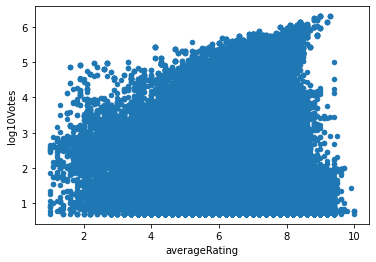

In [19]:
df_new.plot.scatter(x='averageRating', y='log10Votes')

In [20]:
df_avgR = df_new.groupby(['averageRating']).mean().reset_index() # Reset_index to keep averageRating as 1 col
df_avgR.head(5)

,averageRating,isAdult,ordering,numVotes,log10Votes
0,1.0,0.000000,1.437500,165.375000,1.725042
1,1.1,0.153846,1.923077,233.461538,2.094683
2,1.2,0.000000,2.050000,351.300000,2.271564
3,1.3,0.000000,2.178571,523.928571,2.016823
4,1.4,0.000000,1.678571,218.785714,1.891898


<AxesSubplot:xlabel='averageRating', ylabel='log10Votes'>

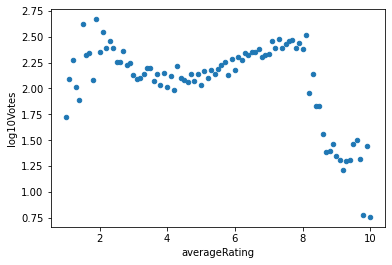

In [21]:
df_avgR.plot.scatter(x='averageRating', y='log10Votes')

## 9. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:
Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. 

#### 9.1 Using sklearn (least-squares regression)

In [22]:
x = np.array(df_avgR.averageRating).reshape((-1, 1))
y = np.array(df_avgR.log10Votes).reshape((-1, 1))
reg1 = LinearRegression().fit(x, y)
print('R\u00b2 = {} \nIntercept = {} \nSlope = {}'
      .format(reg1.score(x,y).round(2), reg1.intercept_[0].round(3), 
                  reg1.coef_[0][0].round(3)))

R² = 0.28 
Intercept = 2.511 
Slope = -0.079


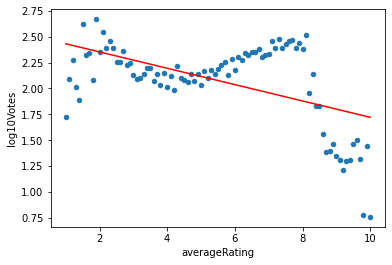

In [23]:
y_pred = reg1.predict(x)
df_avgR.plot.scatter(x='averageRating', y='log10Votes')
plt.plot(x,y_pred,c='r')
plt.show()

#### 9.2 Using scipy  (least-squares regression)

In [24]:
reg2 = stats.linregress(np.array(df_avgR.averageRating),np.array(df_avgR.log10Votes))
#print(reg2)

print('R\u00b2 = {} \nIntercept = {} \nSlope = {}'
      .format((reg2.rvalue**2).round(2), reg2.intercept.round(3), 
                  reg2.slope.round(3)))

R² = 0.28 
Intercept = 2.511 
Slope = -0.079


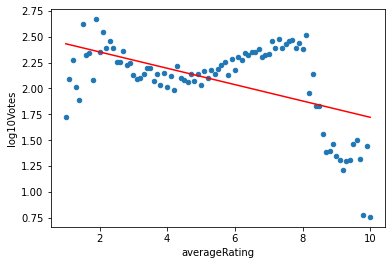

In [25]:
df_avgR.plot.scatter(x='averageRating', y='log10Votes')
plt.plot(np.array(df_avgR.averageRating), reg2.slope * np.array(df_avgR.averageRating)+reg2.intercept, c='r' )
plt.show()

#### 9.3 Using pytorch 

In [26]:
# training variables
x = np.array(df_avgR.averageRating,dtype=np.float32).reshape((-1, 1))
y = np.array(df_avgR.log10Votes,dtype=np.float32).reshape((-1, 1))

In [27]:
#https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/
#https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

    # Create model class
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [28]:
# Instantiate model class
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 5000

model = LinearRegressionModel(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [29]:
# Initialise the loss and optimization functions
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [30]:
losscurve=[]
# Train the model
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(x))
        labels = Variable(torch.from_numpy(y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    losscurve.append(loss.item())

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 9.125801086425781
epoch 1, loss 2.2343556880950928
epoch 2, loss 1.823684811592102
epoch 3, loss 1.7883671522140503
epoch 4, loss 1.774868130683899
epoch 5, loss 1.762715458869934
epoch 6, loss 1.7507234811782837
epoch 7, loss 1.7388224601745605
epoch 8, loss 1.7270082235336304
epoch 9, loss 1.7152795791625977
epoch 10, loss 1.7036362886428833
epoch 11, loss 1.6920772790908813
epoch 12, loss 1.6806021928787231
epoch 13, loss 1.669210433959961
epoch 14, loss 1.6579011678695679
epoch 15, loss 1.6466737985610962
epoch 16, loss 1.6355282068252563
epoch 17, loss 1.624463438987732
epoch 18, loss 1.6134788990020752
epoch 19, loss 1.6025739908218384
epoch 20, loss 1.5917483568191528
epoch 21, loss 1.5810015201568604
epoch 22, loss 1.5703322887420654
epoch 23, loss 1.5597405433654785
epoch 24, loss 1.5492256879806519
epoch 25, loss 1.5387870073318481
epoch 26, loss 1.5284242630004883
epoch 27, loss 1.5181366205215454
epoch 28, loss 1.5079237222671509
epoch 29, loss 1.4977847337722

epoch 465, loss 0.16858245432376862
epoch 466, loss 0.16816183924674988
epoch 467, loss 0.16774427890777588
epoch 468, loss 0.16732977330684662
epoch 469, loss 0.16691824793815613
epoch 470, loss 0.1665097177028656
epoch 471, loss 0.16610413789749146
epoch 472, loss 0.16570152342319489
epoch 473, loss 0.1653018295764923
epoch 474, loss 0.16490504145622253
epoch 475, loss 0.16451111435890198
epoch 476, loss 0.16412006318569183
epoch 477, loss 0.16373184323310852
epoch 478, loss 0.16334643959999084
epoch 479, loss 0.16296380758285522
epoch 480, loss 0.16258396208286285
epoch 481, loss 0.16220687329769135
epoch 482, loss 0.1618325561285019
epoch 483, loss 0.16146089136600494
epoch 484, loss 0.16109196841716766
epoch 485, loss 0.16072571277618408
epoch 486, loss 0.1603620946407318
epoch 487, loss 0.16000114381313324
epoch 488, loss 0.1596428006887436
epoch 489, loss 0.15928706526756287
epoch 490, loss 0.15893393754959106
epoch 491, loss 0.15858334302902222
epoch 492, loss 0.158235251903533

epoch 914, loss 0.11281967908143997
epoch 915, loss 0.11280369013547897
epoch 916, loss 0.11278782039880753
epoch 917, loss 0.11277206987142563
epoch 918, loss 0.11275643855333328
epoch 919, loss 0.1127409040927887
epoch 920, loss 0.11272548884153366
epoch 921, loss 0.11271017044782639
epoch 922, loss 0.11269497871398926
epoch 923, loss 0.11267989873886108
epoch 924, loss 0.11266492307186127
epoch 925, loss 0.11265005171298981
epoch 926, loss 0.1126352846622467
epoch 927, loss 0.11262065917253494
epoch 928, loss 0.11260610818862915
epoch 929, loss 0.11259166151285172
epoch 930, loss 0.11257733404636383
epoch 931, loss 0.1125631034374237
epoch 932, loss 0.11254897713661194
epoch 933, loss 0.11253495514392853
epoch 934, loss 0.11252102255821228
epoch 935, loss 0.11250720173120499
epoch 936, loss 0.11249349266290665
epoch 937, loss 0.11247987300157547
epoch 938, loss 0.11246632784605026
epoch 939, loss 0.1124529168009758
epoch 940, loss 0.1124395877122879
epoch 941, loss 0.112426370382308

epoch 1382, loss 0.11068913340568542
epoch 1383, loss 0.11068859696388245
epoch 1384, loss 0.11068807542324066
epoch 1385, loss 0.11068753898143768
epoch 1386, loss 0.1106870174407959
epoch 1387, loss 0.1106865257024765
epoch 1388, loss 0.11068601161241531
epoch 1389, loss 0.11068548262119293
epoch 1390, loss 0.11068499088287354
epoch 1391, loss 0.11068449169397354
epoch 1392, loss 0.11068398505449295
epoch 1393, loss 0.11068350076675415
epoch 1394, loss 0.11068302392959595
epoch 1395, loss 0.11068253219127655
epoch 1396, loss 0.11068205535411835
epoch 1397, loss 0.11068157851696014
epoch 1398, loss 0.11068110167980194
epoch 1399, loss 0.11068063974380493
epoch 1400, loss 0.11068014800548553
epoch 1401, loss 0.11067970097064972
epoch 1402, loss 0.11067923158407211
epoch 1403, loss 0.1106787845492363
epoch 1404, loss 0.11067833751440048
epoch 1405, loss 0.11067787557840347
epoch 1406, loss 0.11067741364240646
epoch 1407, loss 0.11067698895931244
epoch 1408, loss 0.11067655682563782
epoc

epoch 1850, loss 0.11061859130859375
epoch 1851, loss 0.11061856895685196
epoch 1852, loss 0.11061856150627136
epoch 1853, loss 0.11061853170394897
epoch 1854, loss 0.11061851680278778
epoch 1855, loss 0.11061850935220718
epoch 1856, loss 0.1106184870004654
epoch 1857, loss 0.1106184646487236
epoch 1858, loss 0.1106184646487236
epoch 1859, loss 0.11061844229698181
epoch 1860, loss 0.11061841249465942
epoch 1861, loss 0.11061841249465942
epoch 1862, loss 0.11061839014291763
epoch 1863, loss 0.11061836779117584
epoch 1864, loss 0.11061836034059525
epoch 1865, loss 0.11061835289001465
epoch 1866, loss 0.11061833053827286
epoch 1867, loss 0.11061830818653107
epoch 1868, loss 0.11061830073595047
epoch 1869, loss 0.11061827838420868
epoch 1870, loss 0.11061826348304749
epoch 1871, loss 0.11061825603246689
epoch 1872, loss 0.1106182336807251
epoch 1873, loss 0.1106182262301445
epoch 1874, loss 0.1106182113289833
epoch 1875, loss 0.11061818152666092
epoch 1876, loss 0.11061818152666092
epoch 1

epoch 2323, loss 0.11061624437570572
epoch 2324, loss 0.11061625182628632
epoch 2325, loss 0.11061625182628632
epoch 2326, loss 0.11061625182628632
epoch 2327, loss 0.11061625182628632
epoch 2328, loss 0.11061625182628632
epoch 2329, loss 0.11061624437570572
epoch 2330, loss 0.11061626672744751
epoch 2331, loss 0.11061625182628632
epoch 2332, loss 0.11061625182628632
epoch 2333, loss 0.11061624437570572
epoch 2334, loss 0.11061624437570572
epoch 2335, loss 0.11061624437570572
epoch 2336, loss 0.11061624437570572
epoch 2337, loss 0.11061624437570572
epoch 2338, loss 0.11061624437570572
epoch 2339, loss 0.11061625182628632
epoch 2340, loss 0.11061625182628632
epoch 2341, loss 0.11061624437570572
epoch 2342, loss 0.11061624437570572
epoch 2343, loss 0.11061623692512512
epoch 2344, loss 0.11061624437570572
epoch 2345, loss 0.11061624437570572
epoch 2346, loss 0.11061624437570572
epoch 2347, loss 0.11061624437570572
epoch 2348, loss 0.11061624437570572
epoch 2349, loss 0.11061625182628632
e

epoch 2789, loss 0.11061616986989975
epoch 2790, loss 0.11061617732048035
epoch 2791, loss 0.11061619222164154
epoch 2792, loss 0.11061616986989975
epoch 2793, loss 0.11061619222164154
epoch 2794, loss 0.11061619222164154
epoch 2795, loss 0.11061617732048035
epoch 2796, loss 0.11061617732048035
epoch 2797, loss 0.11061619222164154
epoch 2798, loss 0.11061616986989975
epoch 2799, loss 0.11061617732048035
epoch 2800, loss 0.11061617732048035
epoch 2801, loss 0.11061617732048035
epoch 2802, loss 0.11061617732048035
epoch 2803, loss 0.11061617732048035
epoch 2804, loss 0.11061619222164154
epoch 2805, loss 0.11061617732048035
epoch 2806, loss 0.11061617732048035
epoch 2807, loss 0.11061619222164154
epoch 2808, loss 0.11061619222164154
epoch 2809, loss 0.11061619222164154
epoch 2810, loss 0.11061619222164154
epoch 2811, loss 0.11061617732048035
epoch 2812, loss 0.11061619222164154
epoch 2813, loss 0.11061617732048035
epoch 2814, loss 0.11061617732048035
epoch 2815, loss 0.11061617732048035
e

epoch 3259, loss 0.11061616986989975
epoch 3260, loss 0.11061616986989975
epoch 3261, loss 0.11061616986989975
epoch 3262, loss 0.11061616986989975
epoch 3263, loss 0.11061616986989975
epoch 3264, loss 0.11061616986989975
epoch 3265, loss 0.11061616986989975
epoch 3266, loss 0.11061616986989975
epoch 3267, loss 0.11061616986989975
epoch 3268, loss 0.11061616986989975
epoch 3269, loss 0.11061616986989975
epoch 3270, loss 0.11061616986989975
epoch 3271, loss 0.11061616986989975
epoch 3272, loss 0.11061616986989975
epoch 3273, loss 0.11061616986989975
epoch 3274, loss 0.11061616986989975
epoch 3275, loss 0.11061616986989975
epoch 3276, loss 0.11061616986989975
epoch 3277, loss 0.11061616986989975
epoch 3278, loss 0.11061616986989975
epoch 3279, loss 0.11061616986989975
epoch 3280, loss 0.11061616986989975
epoch 3281, loss 0.11061616986989975
epoch 3282, loss 0.11061616986989975
epoch 3283, loss 0.11061616986989975
epoch 3284, loss 0.11061616986989975
epoch 3285, loss 0.11061616986989975
e

epoch 3737, loss 0.11061616986989975
epoch 3738, loss 0.11061616986989975
epoch 3739, loss 0.11061616986989975
epoch 3740, loss 0.11061616986989975
epoch 3741, loss 0.11061616986989975
epoch 3742, loss 0.11061616986989975
epoch 3743, loss 0.11061616986989975
epoch 3744, loss 0.11061616986989975
epoch 3745, loss 0.11061616986989975
epoch 3746, loss 0.11061616986989975
epoch 3747, loss 0.11061616986989975
epoch 3748, loss 0.11061616986989975
epoch 3749, loss 0.11061616986989975
epoch 3750, loss 0.11061616986989975
epoch 3751, loss 0.11061616986989975
epoch 3752, loss 0.11061616986989975
epoch 3753, loss 0.11061616986989975
epoch 3754, loss 0.11061616986989975
epoch 3755, loss 0.11061616986989975
epoch 3756, loss 0.11061616986989975
epoch 3757, loss 0.11061616986989975
epoch 3758, loss 0.11061616986989975
epoch 3759, loss 0.11061616986989975
epoch 3760, loss 0.11061616986989975
epoch 3761, loss 0.11061616986989975
epoch 3762, loss 0.11061616986989975
epoch 3763, loss 0.11061616986989975
e

epoch 4211, loss 0.11061616986989975
epoch 4212, loss 0.11061616986989975
epoch 4213, loss 0.11061616986989975
epoch 4214, loss 0.11061616986989975
epoch 4215, loss 0.11061616986989975
epoch 4216, loss 0.11061616986989975
epoch 4217, loss 0.11061616986989975
epoch 4218, loss 0.11061616986989975
epoch 4219, loss 0.11061616986989975
epoch 4220, loss 0.11061616986989975
epoch 4221, loss 0.11061616986989975
epoch 4222, loss 0.11061616986989975
epoch 4223, loss 0.11061616986989975
epoch 4224, loss 0.11061616986989975
epoch 4225, loss 0.11061616986989975
epoch 4226, loss 0.11061616986989975
epoch 4227, loss 0.11061616986989975
epoch 4228, loss 0.11061616986989975
epoch 4229, loss 0.11061616986989975
epoch 4230, loss 0.11061616986989975
epoch 4231, loss 0.11061616986989975
epoch 4232, loss 0.11061616986989975
epoch 4233, loss 0.11061616986989975
epoch 4234, loss 0.11061616986989975
epoch 4235, loss 0.11061616986989975
epoch 4236, loss 0.11061616986989975
epoch 4237, loss 0.11061616986989975
e

epoch 4675, loss 0.11061616986989975
epoch 4676, loss 0.11061616986989975
epoch 4677, loss 0.11061616986989975
epoch 4678, loss 0.11061616986989975
epoch 4679, loss 0.11061616986989975
epoch 4680, loss 0.11061616986989975
epoch 4681, loss 0.11061616986989975
epoch 4682, loss 0.11061616986989975
epoch 4683, loss 0.11061616986989975
epoch 4684, loss 0.11061616986989975
epoch 4685, loss 0.11061616986989975
epoch 4686, loss 0.11061616986989975
epoch 4687, loss 0.11061616986989975
epoch 4688, loss 0.11061616986989975
epoch 4689, loss 0.11061616986989975
epoch 4690, loss 0.11061616986989975
epoch 4691, loss 0.11061616986989975
epoch 4692, loss 0.11061616986989975
epoch 4693, loss 0.11061616986989975
epoch 4694, loss 0.11061616986989975
epoch 4695, loss 0.11061616986989975
epoch 4696, loss 0.11061616986989975
epoch 4697, loss 0.11061616986989975
epoch 4698, loss 0.11061616986989975
epoch 4699, loss 0.11061616986989975
epoch 4700, loss 0.11061616986989975
epoch 4701, loss 0.11061616986989975
e

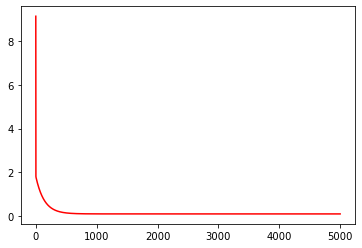

In [31]:
# plot the loss to see if epoch is high enough (1000 seems enough here)
plt.plot(np.array(range(epochs)), np.array(losscurve), c='r' )


In [32]:
print(x)
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x))).data.numpy()
    print(predicted)

[[ 1. ]
 [ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.4]
 [ 1.5]
 [ 1.6]
 [ 1.7]
 [ 1.8]
 [ 1.9]
 [ 2. ]
 [ 2.1]
 [ 2.2]
 [ 2.3]
 [ 2.4]
 [ 2.5]
 [ 2.6]
 [ 2.7]
 [ 2.8]
 [ 2.9]
 [ 3. ]
 [ 3.1]
 [ 3.2]
 [ 3.3]
 [ 3.4]
 [ 3.5]
 [ 3.6]
 [ 3.7]
 [ 3.8]
 [ 3.9]
 [ 4. ]
 [ 4.1]
 [ 4.2]
 [ 4.3]
 [ 4.4]
 [ 4.5]
 [ 4.6]
 [ 4.7]
 [ 4.8]
 [ 4.9]
 [ 5. ]
 [ 5.1]
 [ 5.2]
 [ 5.3]
 [ 5.4]
 [ 5.5]
 [ 5.6]
 [ 5.7]
 [ 5.8]
 [ 5.9]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.3]
 [ 6.4]
 [ 6.5]
 [ 6.6]
 [ 6.7]
 [ 6.8]
 [ 6.9]
 [ 7. ]
 [ 7.1]
 [ 7.2]
 [ 7.3]
 [ 7.4]
 [ 7.5]
 [ 7.6]
 [ 7.7]
 [ 7.8]
 [ 7.9]
 [ 8. ]
 [ 8.1]
 [ 8.2]
 [ 8.3]
 [ 8.4]
 [ 8.5]
 [ 8.6]
 [ 8.7]
 [ 8.8]
 [ 8.9]
 [ 9. ]
 [ 9.1]
 [ 9.2]
 [ 9.3]
 [ 9.4]
 [ 9.5]
 [ 9.6]
 [ 9.7]
 [ 9.8]
 [ 9.9]
 [10. ]]
[[2.4315846]
 [2.4236908]
 [2.4157972]
 [2.4079037]
 [2.4000099]
 [2.3921163]
 [2.3842225]
 [2.376329 ]
 [2.3684354]
 [2.3605416]
 [2.352648 ]
 [2.3447542]
 [2.3368607]
 [2.328967 ]
 [2.3210733]
 [2.3131797]
 [2.305286 ]
 [2.2973924]
 [2.2894986]
 [2.281605 ]
 [2.2737114

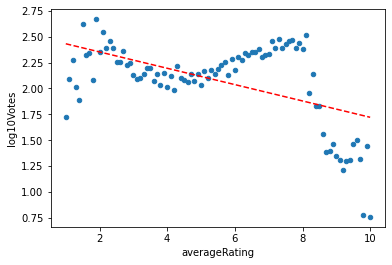

In [33]:
df_avgR.plot.scatter(x='averageRating', y='log10Votes')
plt.plot(x, predicted, '--', c='r' )

#plt.plot(np.array(df_avgR.averageRating), reg2.slope * np.array(df_avgR.averageRating)+reg2.intercept, c='r' )
plt.show()

In [34]:
slope3     = model.linear.weight.data.numpy()[0][0]   # slope
intercept3 = model.linear.bias.data.numpy()[0]        # intercept
R_sq3      = sklearn.metrics.r2_score(y,predicted)

print('R\u00b2 = {} \nIntercept = {} \nSlope = {}'
      .format(R_sq3.round(2), intercept3.round(3), slope3.round(3)))

R² = 0.28 
Intercept = 2.510999917984009 
Slope = -0.07900000363588333


##### If you wanted to build a better regression model what would you do?  

one could choose a polynomial regression model instead of a linear regression
This could be done using the polyfit function as below and also other function such as pyTorch

In [35]:
polyn = 3
p    = np.polyfit(np.array(df_avgR.averageRating),np.array(df_avgR.log10Votes),polyn)
pred = np.polyval(p,np.array(df_avgR.averageRating))

R_sq4 = sklearn.metrics.r2_score(np.array(df_avgR.log10Votes),pred)

print('R\u00b2 = {} \npolyfit coef = {}'.format(R_sq4.round(2), p))

R² = 0.7 
polyfit coef = [-0.01089076  0.14686832 -0.57091523  2.81211384]


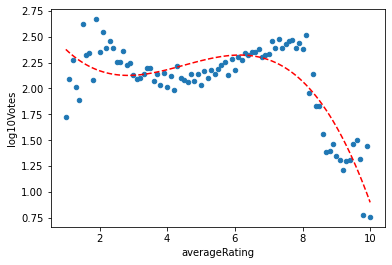

In [36]:
df_avgR.plot.scatter(x='averageRating', y='log10Votes')
plt.plot(np.array(df_avgR.averageRating), pred, '--', c='r' )

#plt.plot(np.array(df_avgR.averageRating), reg2.slope * np.array(df_avgR.averageRating)+reg2.intercept, c='r' )
plt.show()

## 10. You should commit at least three different versions of your notebook to your github account to demonstrate that you know the basics of using git for version control. 

my github profile is margo82

the project name is DSI_DecTest

## 11. Share your notebook with us as a Google Colab notebook. Include your github account in your Colab notebook intro and make sure your commits are public. 